# Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Datasets

In [3]:
salesdata = pd.read_csv('Super_Store.csv')
salesdata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
Row ID           2121 non-null int64
Order ID         2121 non-null object
Order Date       2121 non-null object
Ship Date        2121 non-null object
Ship Mode        2121 non-null object
Customer ID      2121 non-null object
Customer Name    2121 non-null object
Segment          2121 non-null object
Country          2121 non-null object
City             2121 non-null object
State            2121 non-null object
Postal Code      2121 non-null int64
Region           2121 non-null object
Product ID       2121 non-null object
Category         2121 non-null object
Sub-Category     2121 non-null object
Product Name     2121 non-null object
Sales            2121 non-null float64
Quantity         2121 non-null int64
Discount         2121 non-null float64
Profit           2121 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 348.1+ KB


In [5]:
all_data_pairplot_sales = salesdata[['Quantity','Discount','Profit','Sales']]
all_data_pairplot_sales.describe()

,Quantity,Discount,Profit,Sales
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,3.785007,0.173923,8.699327,349.834887
std,2.251620,0.181547,136.049246,503.179145
min,1.000000,0.000000,-1862.312400,1.892000
25%,2.000000,0.000000,-12.849000,47.040000
50%,3.000000,0.200000,7.774800,182.220000
75%,5.000000,0.300000,33.726600,435.168000
max,14.000000,0.700000,1013.127000,4416.174000


In [6]:
#salesdata['date']=salesdata['Order Date'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%y'))

# Data Visualizations

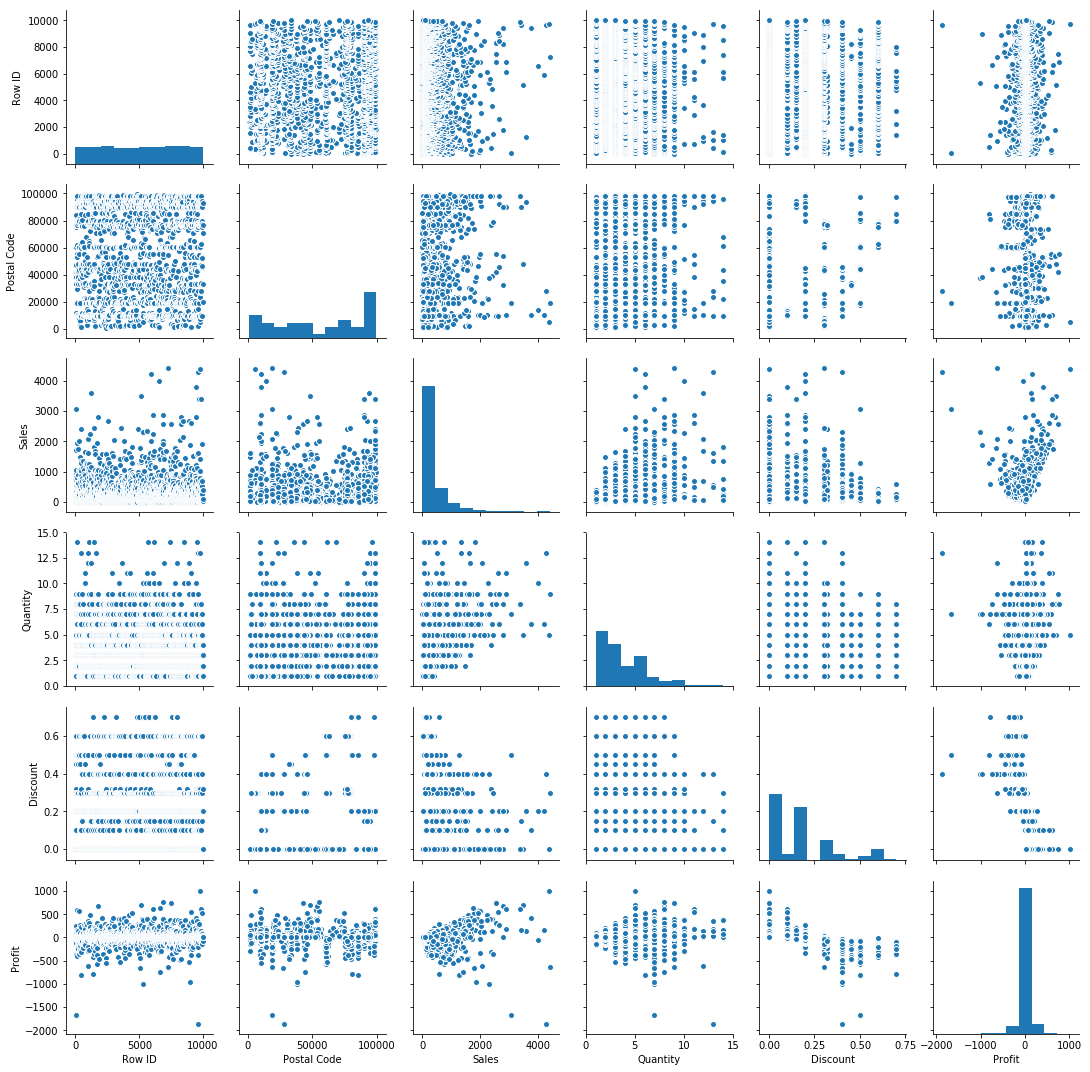

In [7]:
sns.pairplot(salesdata)

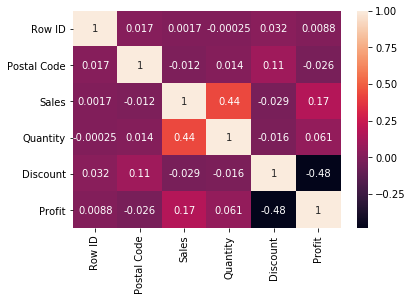

In [7]:
sns.heatmap(salesdata.corr(),annot = True)

In [8]:
all_X = salesdata[['Postal Code','Quantity','Discount','Profit']]
all_y = salesdata['Sales']



In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(all_X,all_y)

In [11]:
X_train.head()

,Postal Code,Quantity,Discount,Profit
81,33024,3,0.45,-157.0095
1760,90036,3,0.20,45.2940
193,19120,7,0.20,-12.9122
659,42420,5,0.00,25.6200
523,94122,3,0.20,78.7671


In [12]:
from sklearn.neighbors import KNeighborsRegressor


In [13]:
knn = KNeighborsRegressor(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  

In [16]:
#knn_train_score = knn.score(xd_train, yd_train)
knn_test_score = knn.score(X_test, y_test)
#knn_train_mape = mape(y_train, knn_)
knn_test_mape = mape(y_test, knn_pred)
print(knn_test_mape)
print(knn_test_score)

275.3857779887821
0.0976338981528102


In [17]:
orderdata = pd.read_csv('orderdata.csv')
orderdata.head()

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
orderdata.date=orderdata.OrderDate.apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%y'))
# check
print(orderdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
OrderDate        9994 non-null object
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 1.6+ MB
None


C:\Users\System1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


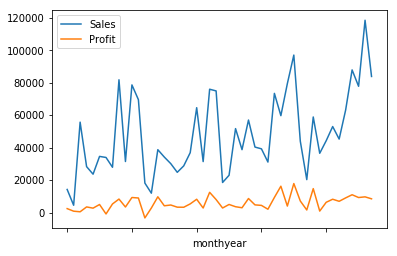

In [19]:
orderdata['orderyear'] = orderdata.date.dt.year
orderdata['ordermonth'] = orderdata.date.dt.month

orderdata['monthyear'] = orderdata.apply(lambda row :
                          (row.orderyear,row.ordermonth), 
                                    axis=1)
newdf = orderdata[['monthyear', 'Sales', 'Profit']].copy()

newdf.groupby([newdf.monthyear]).sum().plot()

Text(0.5,1,'Sales and Profits over the Years')

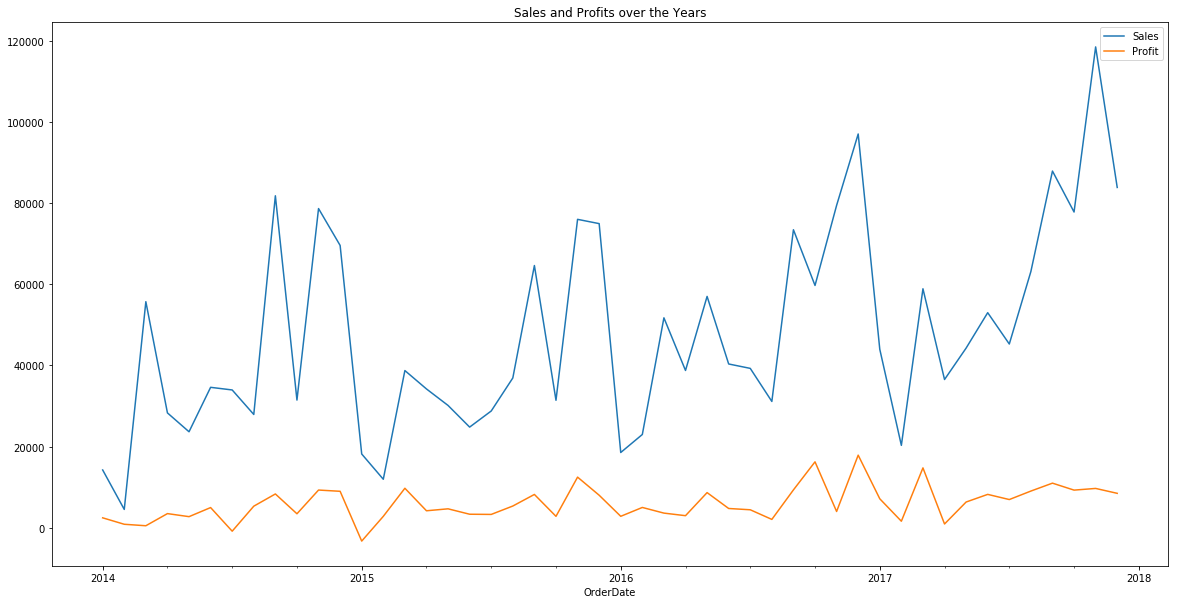

In [20]:
matplotlibdf = orderdata[['OrderDate', 'Sales', 'Profit']].copy()
matplotlibdf['OrderDate'] = pd.to_datetime(matplotlibdf['OrderDate'], format='%m/%d/%y')
#matplotlibdf.Sales.resample('M',how='sum')
#matplotlibdf
linechartData = matplotlibdf.groupby([pd.Grouper(freq='MS',key='OrderDate')]).sum()
linechartData.plot(figsize=(20,10))
plt.gca()
plt.title("Sales and Profits over the Years")

In [21]:
orderdata['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

Text(0.5,1,'Sales of each Segment of all years')

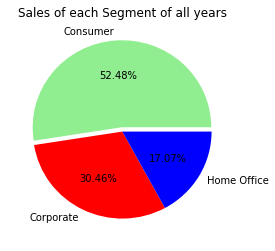

In [22]:
consumer = len(salesdata[salesdata["Segment"]== 'Consumer']["Sales"])
corporate = len(salesdata[salesdata["Segment"]== 'Corporate']["Sales"])
home_office = len(salesdata[salesdata["Segment"]== 'Home Office']["Sales"])

 
values = [consumer,corporate,home_office]
labels = ["Consumer","Corporate","Home Office"]
colors = ['lightgreen','red','blue']
explode = [0.05,0,0]
fig = plt.figure(figsize = (4,4))
pie = plt.pie(values, labels = labels, colors = colors, explode = explode, autopct = '%4.2f%%')
plt.title("Sales of each Segment of all years")

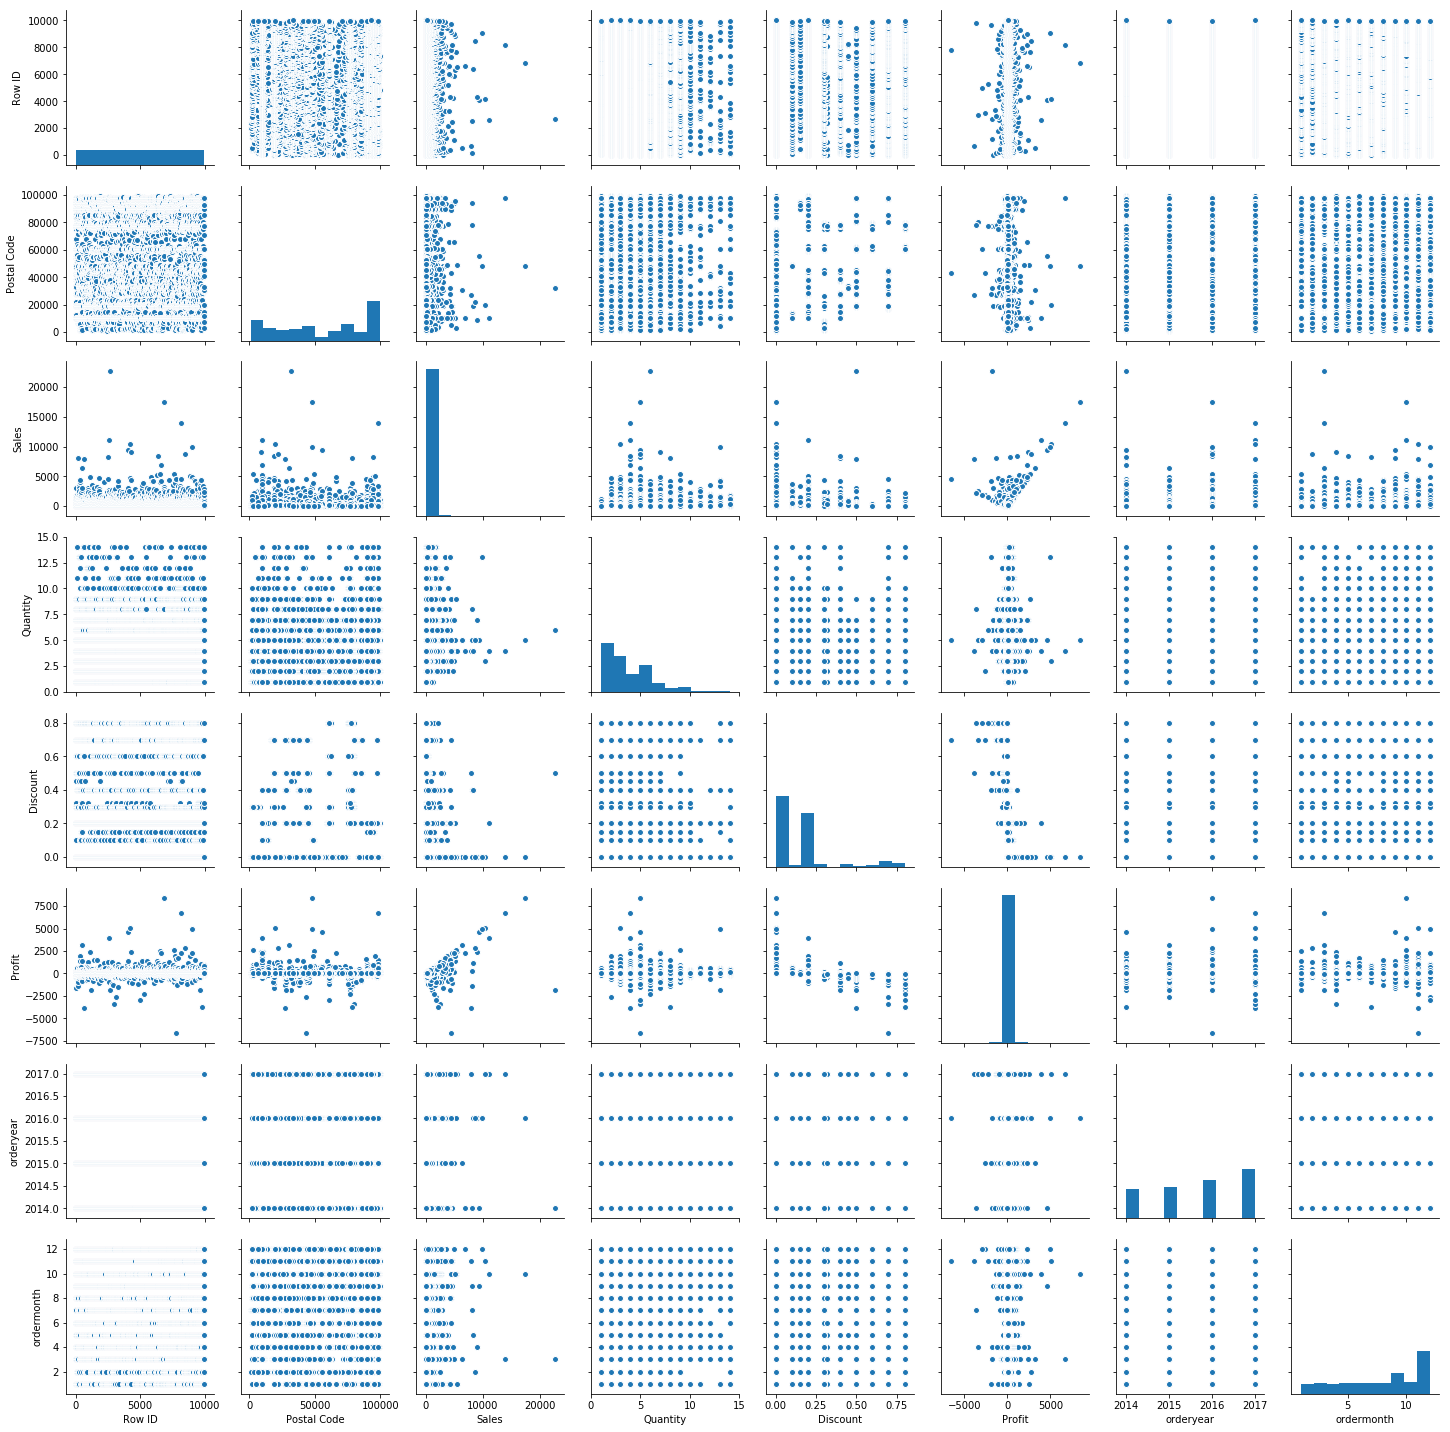

In [23]:
sns.pairplot(orderdata)

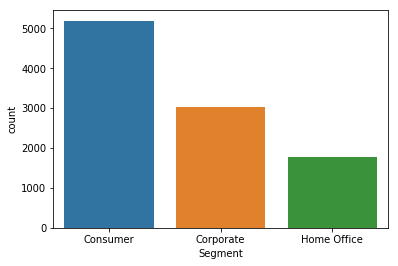

In [25]:
sns.countplot(x = "Segment",data = orderdata)


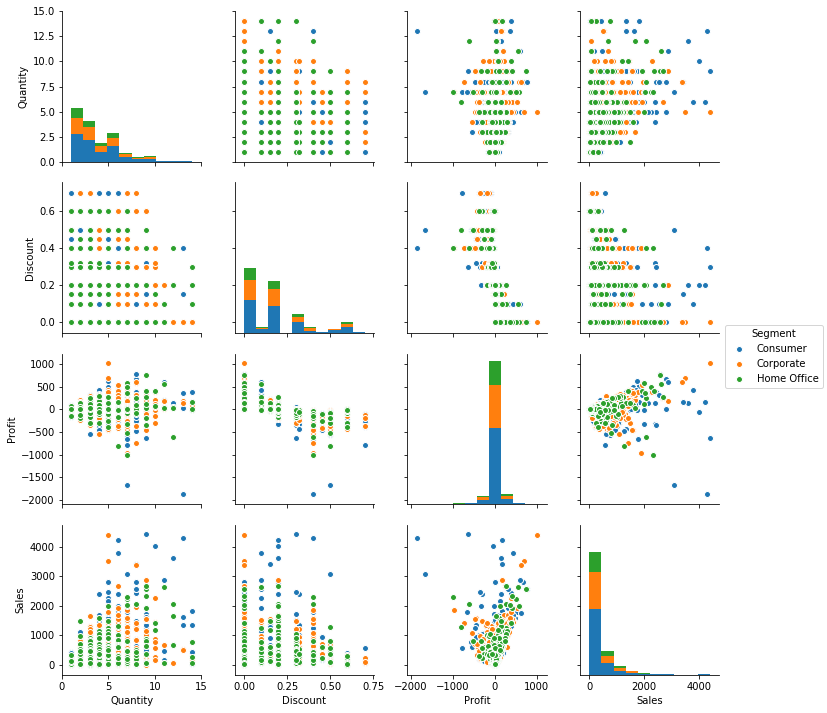

In [26]:
all_data_pairplot_segment = salesdata[['Quantity','Discount','Profit','Sales',"Segment"]]
sns.pairplot(all_data_pairplot_segment,hue='Segment')

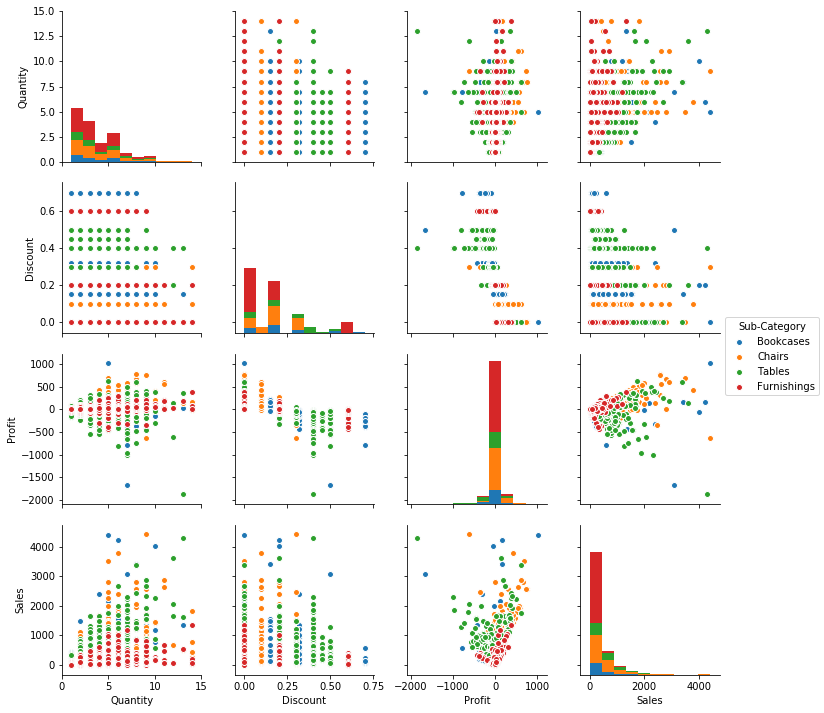

In [27]:
all_data_pairplot_subcat = salesdata[['Quantity','Discount','Profit','Sales',"Sub-Category"]]
sns.pairplot(all_data_pairplot_subcat,hue='Sub-Category')

In [28]:
sns.heatmap(all_data_pairplot.corr(),annot = True)

NameError: name 'all_data_pairplot' is not defined

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
all_X = salesdata[['Postal Code','Quantity','Discount','Profit']]
all_y = salesdata['Sales']


In [28]:
X_train,X_test,y_train,y_test = train_test_split(all_X,all_y,test_size=0.2)

In [29]:
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  


knn_test_score = knn.score(X_test, y_test)
#knn_train_mape = mape(y_train, knn_)
knn_test_mape = mape(y_test, knn_pred)
print(knn_test_mape)
print(knn_test_score)

298.6022560101828
0.2619467727924486


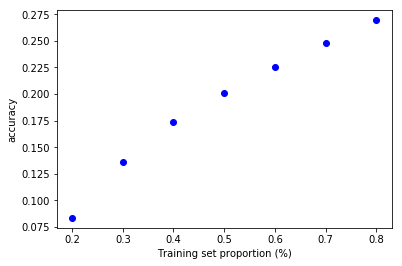

In [31]:
import numpy as np
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsRegressor(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(all_X,all_y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

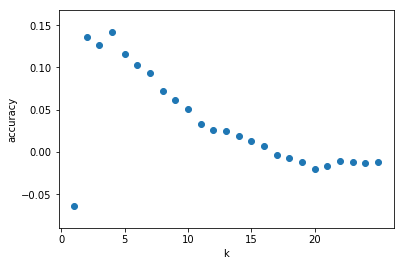

In [35]:
k_range = range(1,26)
scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [32]:
orderdata.columns

Index(['Row ID', 'Order ID', 'OrderDate', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'orderyear',
       'ordermonth', 'monthyear'],
      dtype='object')

In [33]:
orderdata.isnull()

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,orderyear,ordermonth,monthyear
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


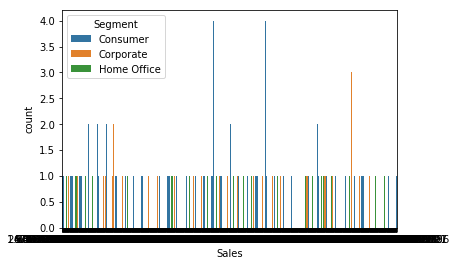

In [39]:
sns.countplot(x="Sales",hue="Segment",data=salesdata)

In [34]:
orderdata['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [35]:
salesdata['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

Text(0.5,1,'Sales of each Sub-Category of Furniture of all years')

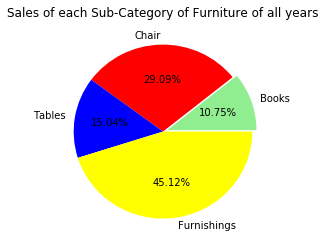

In [42]:
books = len(salesdata[salesdata["Sub-Category"]== 'Bookcases'])
chairs = len(salesdata[salesdata["Sub-Category"]== 'Chairs'])
tables = len(salesdata[salesdata["Sub-Category"]== 'Tables'])
furnishings = len(salesdata[salesdata["Sub-Category"] == 'Furnishings'])

 
values = [books,chairs,tables,furnishings]
labels = ["Books","Chair","Tables","Furnishings"]
colors = ['lightgreen','red','blue','yellow']
explode = [0.05,0,0,0]
fig = plt.figure(figsize = (4,4))
pie = plt.pie(values, labels = labels, colors = colors, explode = explode, autopct = '%4.2f%%')
plt.title("Sales of each Sub-Category of Furniture of all years")

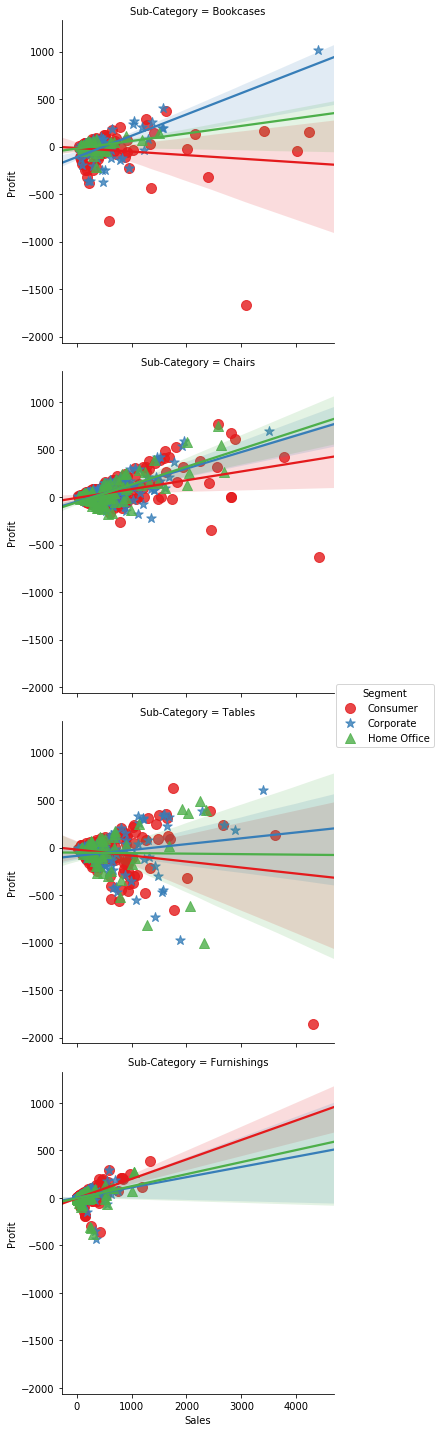

In [43]:
sns.lmplot(x='Sales',y='Profit',data=salesdata,hue='Segment',row='Sub-Category',palette='Set1',markers=['o','*','^'], scatter_kws={'s':100})

# Categorical Splitting

In [36]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
for column in ['Segment','Sub-Category']:
    salesdata = create_dummies(salesdata,column)
    
salesdata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,1,0,0,1,0,0,0
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,1,0,0,0,1,0,0
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,1,0,0,0,0,0,1
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,7,0.00,14.1694,1,0,0,0,0,1,0
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,9,0.20,85.3092,1,0,0,0,0,0,1


In [37]:
salesdata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,1,0,0,1,0,0,0
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,1,0,0,0,1,0,0
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,1,0,0,0,0,0,1
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,7,0.00,14.1694,1,0,0,0,0,1,0
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,9,0.20,85.3092,1,0,0,0,0,0,1


In [38]:
df1 = salesdata.copy()

<IPython.core.display.Javascript object>


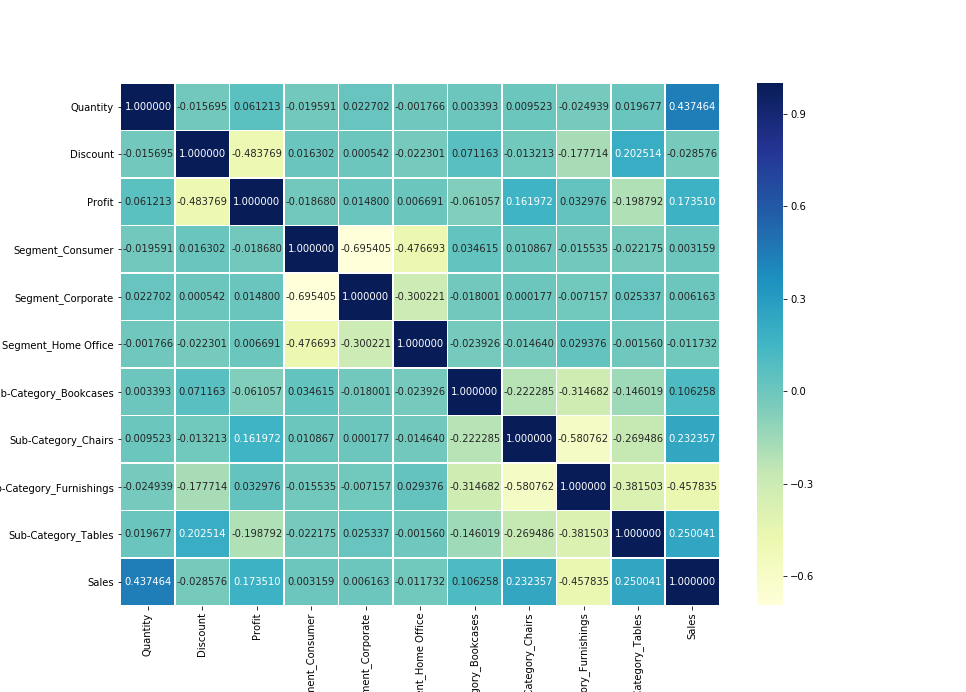

In [49]:
%matplotlib notebook
sns.heatmap(all_data.corr(),annot = True, fmt = "f",linewidths=0.5,cmap="YlGnBu")

In [39]:
salesdata.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Furnishings', 'Sub-Category_Tables'],
      dtype='object')

In [40]:
columns = ["Quantity","Discount","Profit","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables"]
all_X = salesdata[columns]
all_y = salesdata["Sales"]
columns_with_sales = ["Quantity","Discount","Profit","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables","Sales"]
all_data = salesdata[columns_with_sales]

# Train Test Split and Linear Model

In [83]:
from sklearn.model_selection import train_test_split



train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.1,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()

In [85]:
linmodel.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
lm_score = linmodel.score(test_X,test_y)
lm_score

0.40125945023161136

In [87]:
from sklearn import metrics 
lm_pred = linmodel.predict(test_X)


In [88]:
mae_lm= metrics.mean_absolute_error(test_y, lm_pred)
mse_lm = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 221.29327265954217
MSE: 118264.76694861603
RMSE: 343.8964480023253


In [89]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.2,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_1 = linmodel.score(test_X,test_y)
print(lm_score_1)
lm_pred = linmodel.predict(test_X)

mae_lm_1 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_1 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_1 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm_1)
print('MSE:', mse_lm_1)
print('RMSE:', rmse_lm_1)

0.3737715439958841
MAE: 222.9015990879083
MSE: 148293.05819677026
RMSE: 385.08837712500525


In [90]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.3,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_2 = linmodel.score(test_X,test_y)
print(lm_score_2)

lm_pred = linmodel.predict(test_X)
mae_lm_2 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_2 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_2 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm_2)
print('MSE:', mse_lm_2)
print('RMSE:', rmse_lm_2)

0.40688169421099596
MAE: 232.11426315572714
MSE: 145892.6231686661
RMSE: 381.958928641112


In [91]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.4,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_3 = linmodel.score(test_X,test_y)
print(lm_score_3)

lm_pred = linmodel.predict(test_X)
mae_lm_3 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_3 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_3 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm_1)
print('MSE:', mse_lm_3)
print('RMSE:', rmse_lm_3)

0.4607397135899187
MAE: 222.9015990879083
MSE: 126822.94975770629
RMSE: 356.12209950760746


In [92]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.35,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_4 = linmodel.score(test_X,test_y) 
print(lm_score_4)

lm_pred = linmodel.predict(test_X)
mae_lm_4 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_4 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_4 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:',mae_lm_4 )
print('MSE:', mse_lm_4)
print('RMSE:', rmse_lm_4)

0.43860971866863846
MAE: 227.9764459708999
MSE: 134152.28317657844
RMSE: 366.2680482605307


In [99]:
all_models = pd.DataFrame({
    'Model':["Linear Regression with 75/25",'Linear Regression with 80/20','Linear Regression with 70/30','Linear Regression with 90/10','Linear Regression with 65/35',
            'KNN with 75/25','KNN with 80/20','KNN with 70/30','KNN with 90/10','KNN with 65/35'],
    'Score': [lm_score,lm_score_1,lm_score_2,lm_score_3,lm_score_4,knn_score,knn_score_1,knn_score_2,knn_score_3,knn_score_4],
    'Mean Absolute Error': [mae_lm,mae_lm_1,mae_lm_2,mae_lm_3,mae_lm_4,mae_knn,mae_knn_1,mae_knn_2,mae_knn_3,mae_knn_4],
    'Mean Squared Error': [mse_lm,mse_lm_1,mse_lm_2,mse_lm_3,mse_lm_4,mse_knn,mse_knn_1,mse_knn_2,mse_knn_3,mse_knn_4],
    'Root Mean Squared Error':[rmse_lm,rmse_lm_1,rmse_lm_2,rmse_lm_3,rmse_lm_4,rmse_knn,rmse_knn_1,rmse_knn_2,rmse_knn_3,rmse_knn_4]
            })
all_models.sort_values(by='Score',ascending = False)

,Model,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
9,KNN with 65/35,0.528331,184.480046,112712.120818,335.726259
7,KNN with 70/30,0.510396,189.698262,120430.514730,347.031000
8,KNN with 90/10,0.491670,175.971230,100406.709450,316.870178
5,KNN with 75/25,0.479892,187.160885,118191.534509,343.789957
3,Linear Regression with 90/10,0.460740,225.313452,126822.949758,356.122100
6,KNN with 80/20,0.458519,188.681340,128224.554680,358.084564
4,Linear Regression with 65/35,0.438610,227.976446,134152.283177,366.268048
2,Linear Regression with 70/30,0.406882,232.114263,145892.623169,381.958929
0,Linear Regression with 75/25,0.401259,221.293273,118264.766949,343.896448
1,Linear Regression with 80/20,0.373772,222.901599,148293.058197,385.088377


In [93]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm,all_X,all_y,cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.2470101  0.34486096 0.36570461 0.40970516 0.41620472 0.42813834
 0.48990189 0.49549275 0.50037093 0.52258362]
0.4219973057721572


# KNN Regressor

In [94]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.25,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score = knn.score(test_X,test_y) 
print(knn_score)

knn_pred = knn.predict(test_X)
mae_knn = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn )
print('MSE:', mse_knn)
print('RMSE:', rmse_knn)

0.4798915617102736
MAE: 187.16088470809794
MSE: 118191.53450940977
RMSE: 343.7899569641466


In [95]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.2,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_1 = knn.score(test_X,test_y) 
print(knn_score_1)

knn_pred = knn.predict(test_X)
mae_knn_1 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_1 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_1 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_1 )
print('MSE:', mse_knn_1)
print('RMSE:', rmse_knn_1)

0.45851905763057665
MAE: 188.6813397647059
MSE: 128224.55468025415
RMSE: 358.08456358834314


In [96]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.3,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_2 = knn.score(test_X,test_y) 
print(knn_score_2)

knn_pred = knn.predict(test_X)
mae_knn_2 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_2 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_2 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_2 )
print('MSE:', mse_knn_2)
print('RMSE:', rmse_knn_2)

0.510396473030404
MAE: 189.6982616012559
MSE: 120430.51473045489
RMSE: 347.03099966783213


In [97]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.1,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_3 = knn.score(test_X,test_y) 
print(knn_score_3)

knn_pred = knn.predict(test_X)
mae_knn_3 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_3 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_3 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_3 )
print('MSE:', mse_knn_3)
print('RMSE:', rmse_knn_3)

0.4916696665644772
MAE: 175.97122995305165
MSE: 100406.70945022802
RMSE: 316.8701775968007


In [98]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.35,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_4 = knn.score(test_X,test_y) 
print(knn_score_4)

knn_pred = knn.predict(test_X)
mae_knn_4 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_4 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_4 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_4 )
print('MSE:', mse_knn_4)
print('RMSE:', rmse_knn_4)

0.528330881017304
MAE: 184.48004584118436
MSE: 112712.12081789754
RMSE: 335.7262587553996


In [100]:
all_models

,Model,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression with 75/25,0.401259,221.293273,118264.766949,343.896448
1,Linear Regression with 80/20,0.373772,222.901599,148293.058197,385.088377
2,Linear Regression with 70/30,0.406882,232.114263,145892.623169,381.958929
3,Linear Regression with 90/10,0.460740,225.313452,126822.949758,356.122100
4,Linear Regression with 65/35,0.438610,227.976446,134152.283177,366.268048
5,KNN with 75/25,0.479892,187.160885,118191.534509,343.789957
6,KNN with 80/20,0.458519,188.681340,128224.554680,358.084564
7,KNN with 70/30,0.510396,189.698262,120430.514730,347.031000
8,KNN with 90/10,0.491670,175.971230,100406.709450,316.870178
9,KNN with 65/35,0.528331,184.480046,112712.120818,335.726259


<IPython.core.display.Javascript object>


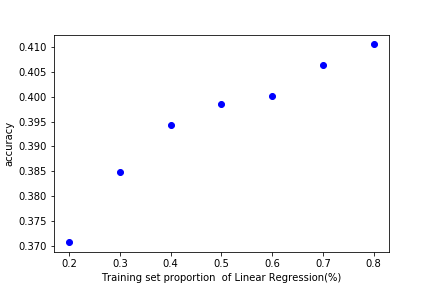

In [72]:
import numpy as np
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

lm = LinearRegression()

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(all_X,all_y, test_size = 1-s)
        lm.fit(X_train, y_train)
        scores.append(lm.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion  of Linear Regression(%)')
plt.ylabel('accuracy');

In [101]:
all_knn =  pd.DataFrame({
    'Model':['KNN with 75/25','KNN with 80/20','KNN with 70/30','KNN with 90/10','KNN with 65/35'],
    'Score': [knn_score,knn_score_1,knn_score_2,knn_score_3,knn_score_4],
    'Mean Absolute Error': [mae_knn,mae_knn_1,mae_knn_2,mae_knn_3,mae_knn_4],
    'Mean Squared Error': [mse_knn,mse_knn_1,mse_knn_2,mse_knn_3,mse_knn_4],
    'Root Mean Squared Error':[rmse_knn,rmse_knn_1,rmse_knn_2,rmse_knn_3,rmse_knn_4]
            })
all_knn

,Model,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,KNN with 75/25,0.479892,187.160885,118191.534509,343.789957
1,KNN with 80/20,0.458519,188.681340,128224.554680,358.084564
2,KNN with 70/30,0.510396,189.698262,120430.514730,347.031000
3,KNN with 90/10,0.491670,175.971230,100406.709450,316.870178
4,KNN with 65/35,0.528331,184.480046,112712.120818,335.726259


In [60]:
all_knn.sort_values(by='Score',ascending = False)

,Model,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
4,KNN with 65/35,0.527919,183.799991,112810.538624,335.872801
2,KNN with 70/30,0.512121,189.006578,120006.295353,346.419248
3,KNN with 90/10,0.492366,175.308290,100269.155077,316.653052
0,KNN with 75/25,0.482026,186.915746,117706.386419,343.083643
1,KNN with 80/20,0.457686,186.711887,128421.833390,358.359922


In [102]:
all_lm = pd.DataFrame({
    'Model':["Linear Regression with 75/25",'Linear Regression with 80/20','Linear Regression with 70/30','Linear Regression with 90/10','Linear Regression with 65/35'],
    'Score': [lm_score,lm_score_1,lm_score_2,lm_score_3,lm_score_4],
    'Mean Absolute Error': [mae_lm,mae_lm_1,mae_lm_2,mae_lm_3,mae_lm_4],
    'Mean Squared Error': [mse_lm,mse_lm_1,mse_lm_2,mse_lm_3,mse_lm_4],
    'Root Mean Squared Error':[rmse_lm,rmse_lm_1,rmse_lm_2,rmse_lm_3,rmse_lm_4]
            })
all_lm.sort_values(by='Score',ascending = False)

,Model,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
3,Linear Regression with 90/10,0.460740,225.313452,126822.949758,356.122100
4,Linear Regression with 65/35,0.438610,227.976446,134152.283177,366.268048
2,Linear Regression with 70/30,0.406882,232.114263,145892.623169,381.958929
0,Linear Regression with 75/25,0.401259,221.293273,118264.766949,343.896448
1,Linear Regression with 80/20,0.373772,222.901599,148293.058197,385.088377


In [62]:
from sklearn.model_selection import train_test_split

columns_profit = ["Quantity","Discount","Sales","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables"]
all_X_profit = salesdata[columns_profit]
all_y_profit = salesdata["Profit"]


train_X_p,test_X_p,train_y_p,test_y_p = train_test_split(all_X_profit,all_y_profit,test_size=0.25,random_state=0)

In [103]:
from sklearn.linear_model import LinearRegression
lmp = LinearRegression()
lmp.fit(train_X_p,train_y_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
print(lmp.intercept_)

39.24887650824314


In [105]:
coeff_df = pd.DataFrame(lmp.coef_,all_X_profit.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Quantity,-2.191189
Discount,-342.538441
Sales,0.071297
Segment_Consumer,-1.048684
Segment_Corporate,4.252869
Segment_Home Office,-3.204186
Sub-Category_Bookcases,-16.093410
Sub-Category_Chairs,32.097217
Sub-Category_Furnishings,20.936244
Sub-Category_Tables,-36.940050


In [106]:
salesdata['Country'].unique()

array(['United States'], dtype=object)

In [107]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)

linridge = Ridge(alpha=100.0).fit(X_train, y_train)


In [108]:
linrid = linridge.score(X_test,y_test)
linrid

0.3816561512042246

# Ridge and Lasso

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
linrid_reg = linridge.score(X_test_scaled,y_test)

In [110]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)
linlasso_score_reg = linlasso.score(X_test_scaled,y_test)


In [111]:
from sklearn.linear_model import Lasso


X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)
linlasso.fit(X_train,y_train)
linlasso_score = linlasso.score(X_test,y_test)

In [112]:
all_models_final = pd.DataFrame({
    'Model':["Linear Regression with 75/25",'Linear Regression with 80/20','Linear Regression with 70/30','Linear Regression with 90/10','Linear Regression with 65/35',
            'KNN with 75/25','KNN with 80/20','KNN with 70/30','KNN with 90/10','KNN with 65/35',
            'Ridge Regression','Ridge Regression with Regularization','Lasso Regrssion',"Lasso Regrssion with Regularization"],
    'Score': [lm_score,lm_score_1,lm_score_2,lm_score_3,lm_score_4,knn_score,knn_score_1,knn_score_2,knn_score_3,knn_score_4,
              linrid,linrid_reg,linlasso_score,linlasso_score_reg]
    
            })
all_models_final.sort_values(by='Score',ascending = False)

,Model,Score
9,KNN with 65/35,0.528331
7,KNN with 70/30,0.510396
8,KNN with 90/10,0.491670
5,KNN with 75/25,0.479892
3,Linear Regression with 90/10,0.460740
6,KNN with 80/20,0.458519
4,Linear Regression with 65/35,0.438610
13,Lasso Regrssion with Regularization,0.410907
2,Linear Regression with 70/30,0.406882
11,Ridge Regression with Regularization,0.402583


In [73]:
salesdata['Order Date'][45].split("/")[2]

'2015'

In [74]:
years_with_sales = salesdata.copy()

In [75]:
def convert(x):
    y = x.split("/")
    return y[2]

In [77]:
years_with_sales['Order Date'] = years_with_sales['Order Date'].apply(convert)

In [78]:
years_with_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,1,CA-2016-152156,2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,1,0,0,1,0,0,0
1,2,CA-2016-152156,2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,1,0,0,0,1,0,0
2,4,US-2015-108966,2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,1,0,0,0,0,0,1
3,6,CA-2014-115812,2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,7,0.00,14.1694,1,0,0,0,0,1,0
4,11,CA-2014-115812,2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,9,0.20,85.3092,1,0,0,0,0,0,1


In [79]:
years_with_sales['Order Date'].unique()

array(['2016', '2015', '2014', '2017'], dtype=object)

In [80]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
for column in ['Order Date']:
    years_with_sales = create_dummies(years_with_sales,column)
    
years_with_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Segment_Corporate,Segment_Home Office,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Order Date_2014,Order Date_2015,Order Date_2016,Order Date_2017
0,1,CA-2016-152156,2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,0,1,0,0,0,0,0,1,0
1,2,CA-2016-152156,2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,0,0,1,0,0,0,0,1,0
2,4,US-2015-108966,2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0,0,0,0,0,1,0,1,0,0
3,6,CA-2014-115812,2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,0,0,0,0,1,0,1,0,0,0
4,11,CA-2014-115812,2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,0,0,0,0,0,1,1,0,0,0


In [82]:
columns = ["Quantity","Discount","Profit","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables",'Order Date_2014','Order Date_2015','Order Date_2016','Order Date_2017']
all_X = years_with_sales[columns]
all_y = years_with_sales["Sales"]

In [113]:
all_X.head()

,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Order Date_2014,Order Date_2015,Order Date_2016,Order Date_2017
0,2,0.00,41.9136,1,0,0,1,0,0,0,0,0,1,0
1,3,0.00,219.5820,1,0,0,0,1,0,0,0,0,1,0
2,5,0.45,-383.0310,1,0,0,0,0,0,1,0,1,0,0
3,7,0.00,14.1694,1,0,0,0,0,1,0,1,0,0,0
4,9,0.20,85.3092,1,0,0,0,0,0,1,1,0,0,0


TypeError: pairplot() missing 1 required positional argument: 'data'

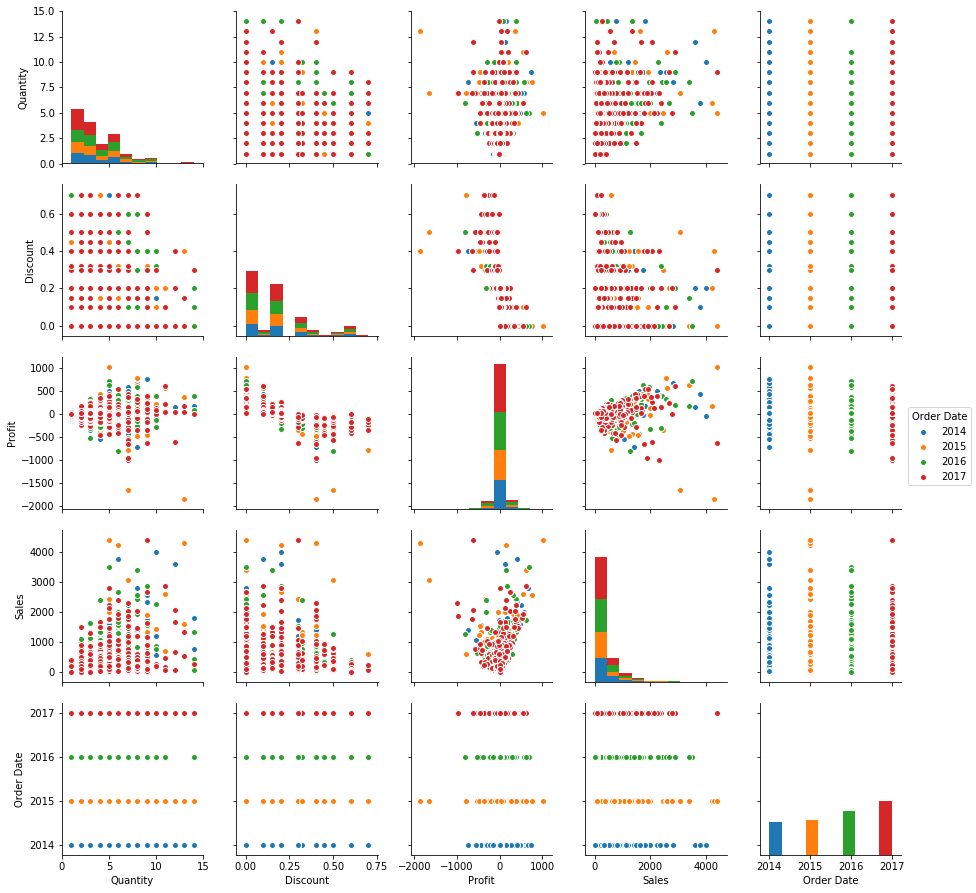

In [114]:
all_data_pairplot_years = years_with_sales[['Quantity','Discount','Profit','Sales',"Sub-Category","Order Date"]]
sns.pairplot(all_data_pairplot_years,hue='Order Date')
sns.pairplot()

In [115]:
salesdata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,1,0,0,1,0,0,0
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,1,0,0,0,1,0,0
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,1,0,0,0,0,0,1
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,7,0.00,14.1694,1,0,0,0,0,1,0
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,9,0.20,85.3092,1,0,0,0,0,0,1


In [116]:
salesdata

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,1,0,0,1,0,0,0
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,1,0,0,0,1,0,0
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,1,0,0,0,0,0,1
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,7,0.00,14.1694,1,0,0,0,0,1,0
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,9,0.20,85.3092,1,0,0,0,0,0,1
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,2,0.30,-1.0196,1,0,0,0,1,0,0
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,3,0.00,240.2649,1,0,0,0,0,0,1
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,7,0.50,-1665.0522,1,0,0,1,0,0,0
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,3,0.20,15.5250,1,0,0,0,0,1,0
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,5,0.60,-147.9630,0,1,0,0,0,1,0
